<a href="https://www.kaggle.com/code/mohammedjasir/logistic-regression-from-scratch-explained?scriptVersionId=147724293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Understanding and Implementing Logistic Regression | From Scratch

A data scientist is mostly hired by firms to look closely into datasets and respond with a True or False or maybe even a Yes or No with the necessary explanations and models. But unlike the analysts the task or data in our hand is mostly messy. Bringing out value from the real data and building models that stands for itself is a big task and it demands fundamental and conceptual understanding.

While building a Linear Regression model, our task was to construct a line that looked like Y=X𝛽 where Y stood for the matrix that had the output variables either 0 or 1, X had the data arranged as each observation as a row and each column as a feature or parameter to predict the output variable and 𝛽 was the weights that we constructed by minimising the Loss Function. The main motive of our line was to find the trend that was followed by our data points.

> Here, our objective is different we now do not want a line that can best fit our data points but **a line that can clearly distinguish between them.**

For an experiment to build a classifier between apples and oranges, if we were collect the data of its size and colour, it would end up looking similar to the graph below. Where both of them had almost similar sizes but were of different colour.

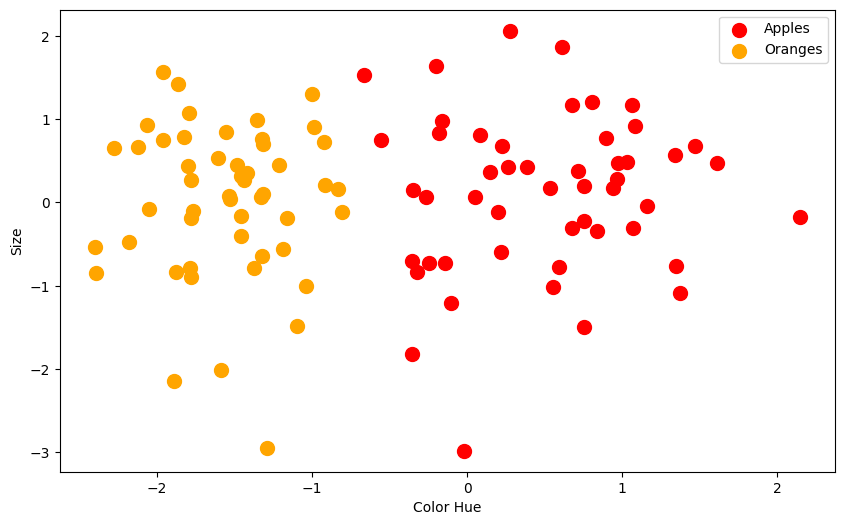

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

dataset = pd.DataFrame(X)
dataset.columns = ['X1', 'X2']
dataset['y'] = y

# Create a scatter plot with red and orange points
plt.figure(figsize=(10, 6))
plt.scatter(dataset[dataset['y']==1]['X1'], dataset[dataset['y']==1]['X2'], c='red', label='Apples', s=100)
plt.scatter(dataset[dataset['y']==0]['X1'], dataset[dataset['y']==0]['X2'], c='orange', label='Oranges', s=100)
# plt.scatter(orange_points, orange_points, c='orange', label='Orange Points', s=100)

# Add labels and legend
plt.xlabel('Color Hue')
plt.ylabel('Size')
plt.legend()

# Show the plot
plt.show()

A very easy and intuitive approach that one could achieve is assign random values to 𝛽 and then iteratively find a random point and make sure if the data point lies on the correct side of the line. And we are already familiar with constructing lines to represent our data and with the same methodology from linear regression let's start.

$\hat{y} = \hat{\beta_0} +\hat{\beta_1}x_1 + \hat{\beta_2}x_2$ 

Since the problem in hand is classification and not regression, let's say that if 𝑦̂>0 ie our predicted value from X𝛽̂ is greater than 0, that would mean the data point lies on the side X𝛽̂>0 (find more here) and in that particular case we assign ŷ to be 1 and if ŷ<0 then it gets assigned to 0. So if the model makes a right prediction then y-ŷ would be 0 otherwise it would be 1 or -1 depending on the prediction. Now, to update the values in 𝛽̂ we follow

$\hat{\beta_i} = \hat{\beta_i} + (y-\hat{y}) (x_i) (lr)$

where y-ŷ tells if 𝛽̂ needs to change or not and even if it has to then onto which direction and x times lr (learning rate) quantifies that change. lr is simply a value called learning rate which tells the model how large of a step should it be taking when updating the weights. And this can be implemented like this,

In [2]:
from sklearn.linear_model import LogisticRegression
lor2 = LogisticRegression()
lor2.fit(X,y)
m = -(lor2.coef_[0][0]/lor2.coef_[0][1])
b = -lor2.intercept_/lor2.coef_[0][1]
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

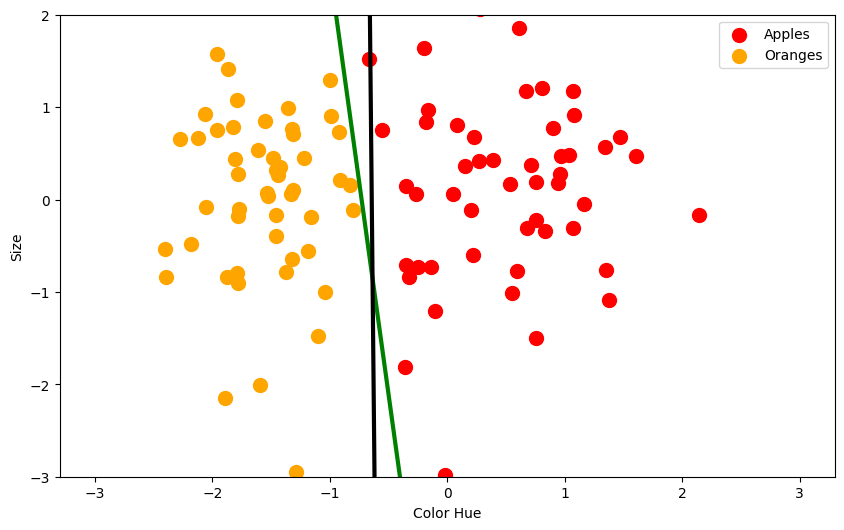

In [3]:
def update_betas(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = 1 if np.dot(X[j],weights)>0 else 0
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
intercept_, coeff_ = update_betas(X, y)
m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])
x_input = np.linspace(-2,2,100)
y_input = m*x_input + b

red_points = X[:,0]
orange_points = X[:,1]

# Create a scatter plot with red and orange points
plt.figure(figsize=(10, 6))
plt.scatter(dataset[dataset['y']==1]['X1'], dataset[dataset['y']==1]['X2'], c='red', label='Apples', s=100)
plt.scatter(dataset[dataset['y']==0]['X1'], dataset[dataset['y']==0]['X2'], c='orange', label='Oranges', s=100)
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)

# Add labels and legend
plt.xlabel('Color Hue')
plt.ylabel('Size')
plt.legend()
plt.ylim(-3,2)
# Show the plot
plt.show()

Here the green line is our model obtained by the code above and the black line is the Logistic Regression model from sklearn. Why are they different? and what is sklearn doing different? Our model would simply perform poorly if the separation between the data points are greater. The line would stay at a point where it would simply agree with the training data. And wont try to make a sense of what the data looks like. Also what if there are wrong data points, like a really orange coloured apple then our model would simply jump around and not conclude to a solution.

## Sigmoid Function

While working with the linear regression model, we created a loss function, a function that defined how well is our model doing and then took the objective to minimize it. But here our outcome is not continuous as in its either Apple or Orange and we programmed our model to say 1 or 0. And this doesn't let us differentiate the function and that is what we did the last time. So to achieve similar result we'll be using a sigmoid function.

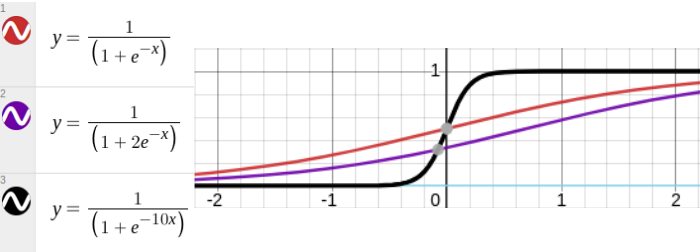

Graph Credits: Desmos. As you can see above if we have a function that does 1/(1+e^(-x)) then we can achieve similar results. For large values of x we get 1 as the output value or return value by our function and for large negative inputs we get a 0. And since this function is continuous we can differentiate it to create our desired loss function. Thus our model becomes:

$\hat{y} = \frac{1}{1+e^{-\hat{\beta}X}} $

## Loss Function
There is one more concept which we need to know before we construct our loss function and that is **Maximum Likelihood Estimation**. Simply put, MLE is a quantitative measure of how well our model is doing in regards to our data. Or let's say if we have two models and when we try to fit our data into it which one gave a better estimation. And to achieve this we multiply the probabilities of each data points in the way it is meant to be. That is our model here just simply gives us an output 0 or 1 and we assign either 0 as apple and 1 as orange. Then if our model gives an output 0.1 this means it's 90% sure that this is an apple. If the data point was actually apple then P(apple) is 0.9 and if it was unfortunately an orange then P(orange) is 0.1. This value is achieved by:

$MLE = P(y_1) \cdot P(y_2) \cdot \cdot P(y_n)$ \
$log(MLE) = log(P(y_1)) + log(P(y_2)) + .. + log(P(y_n))$ \
$log(MLE) = \Sigma (y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i))$

And our objective is to maximize this value, and if we multiple this value with -1/N we get Binary Cross Entropy or also known as log-loss function.

$BCE = \frac{-1}{n} \Sigma (y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i))$

And this is our loss function, our objective is to minimize this value.

## Gradient Descent

To achieve the best fitting model, just as our previous code did we will be taking steps, but this time the direction of our step is going to be in the direction where our loss function will be reducing. And to know this direction we will be taking the derivative wrt 𝛽̂ (weights). To the non-math folks, taking derivative here means if you make a slight change in 𝛽̂ then how much would the loss or cost function change. This is gradient descent where we try to find the local minima by taking small steps in the direction of reducing loss function.

$\frac{dL}{d\hat{\beta}} = \frac{-1}{n} ( y(1-\hat{y})X - \hat{y}(1-y)X ) $ \
$\frac{dL}{d\hat{\beta}} = \frac{-1}{n} (y - \hat{y})X $ \
$\because \frac{d\sigma(x)}{dx} = \sigma(x)(1-\sigma(x))$

Here 𝜎(𝑥) is the sigmoid function as discussed above.

## Updating Our Weights And Implementation

$new \space weight = old\space  weight + (learning\space rate) \cdot (\frac{1}{n}) \cdot y-ŷ \cdot X$

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv('/kaggle/input/logistic-regression/Social_Network_Ads.csv')
df.drop(columns=['User ID'],axis=1,inplace=True)
df["Gender"] = (df["Gender"] == "Male").astype(int)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [6]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Here we have three features or columns which will be targeting to predict if they have purchased.
We dont have any null values and since the intention of this article is to build logistic regression from scratch we'll be diving to it's implementation

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=22)
X_train.shape, X_test.shape, y_train.shape,  y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

class LogRegression:
    def __init__(self):
        """
        Initialize a LogisticRegression object.
        """
        self.coeff_ = None # beta 1 to beta n values
        self.intercept_ = None # beta 0 value

    def fit(self, X, y, steps, lr=0.01):
        """
        Fit the logistic regression model.

        Parameters:
        X (numpy.ndarray): The input feature matrix with shape (n_samples, n_features).
        y (numpy.ndarray): The target values with shape (n_samples,).

        Computes and sets the coefficients (betas) and intercept for the logistic regression model.
        """
        X = np.insert(X,0,1,axis=1)
        weights = np.ones(X.shape[1])
        lr = 0.01

        for i in range(steps):
            y_hat = sigmoid(np.dot(X,weights))
            weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        self.intercept_ = weights[0]
        self.coeff_ = weights[1:]  
        
    def predict(self, X):
        """
        Make predictions using the logistic regression model.

        Parameters:
        X (numpy.ndarray): The input feature matrix for which predictions are to be made with shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Predicted target values with shape (n_samples,).
        """
        threshold = 0.5
        X = np.insert(X,0,1,axis=1)
        weights = np.hstack((self.intercept_, self.coeff_))
        y_pred = (sigmoid(np.dot(X,weights)) >= threshold).astype(int)
        
        return y_pred   
    def coef(self):
        """
        Returns the intercept and coefficients

        Returns:
        values of the coefficients and intercept for the logistic regression model.
        """        
        return self.intercept_, self.coeff_

In [10]:
logistic_regression = LogRegression()
print(f"The weights before training are {logistic_regression.coef()}")
logistic_regression.fit(X_train, y_train, 20000, 1e-4)
print(f"The weights after training are {logistic_regression.coef()}")

The weights before training are (None, None)
The weights after training are (-1.1423086320157982, array([0.16026942, 2.47760728, 1.23709703]))


In [11]:
y_pred_logistic_regression = logistic_regression.predict(X_test)
y_pred_logistic_regression

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [12]:
print("Our Model")
print(f"accuracy score: {accuracy_score(y_test,y_pred_logistic_regression):.4f} \nf1 score: \t{f1_score(y_test,y_pred_logistic_regression):.4f} \nroc_auc_score: \t{roc_auc_score(y_test,y_pred_logistic_regression):.4f}")

Our Model
accuracy score: 0.8875 
f1 score: 	0.8364 
roc_auc_score: 	0.8671


In [13]:
sk_log_reg = LogisticRegression()
sk_log_reg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred_sk_log_reg = sk_log_reg.predict(X_test)
y_pred_sk_log_reg

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [15]:
print("Sklearn Model")
print(f"accuracy score: {accuracy_score(y_test,y_pred_sk_log_reg):.4f} \nf1 score: \t{f1_score(y_test,y_pred_sk_log_reg):.4f} \nroc_auc_score: \t{roc_auc_score(y_test,y_pred_sk_log_reg):.4f}")

Sklearn Model
accuracy score: 0.8875 
f1 score: 	0.8364 
roc_auc_score: 	0.8671
